In [1]:
%%time

display("=== Starting 0-3 Azure Image Captioning ===")

import json
import time
import pandas
import pandas as pd
from adlfs import AzureBlobFileSystem
from tqdm import tqdm

from common.captioning.azure_descriptions import AzureCaption
from common.functions.functions import Functions
from common.schemas.pyarrow_schema import schema
from common.storage.azure_file_storage import AzureFileStorageAdapter

tqdm.pandas(desc="Progress")

file_system: AzureBlobFileSystem = AzureFileStorageAdapter('data').get_file_storage()

functions: Functions = Functions()

'=== Starting 0-3 Azure Image Captioning ==='

CPU times: total: 9.94 s
Wall time: 15.8 s


In [2]:
%%time

curated_data = pandas.read_parquet("data/parquet/back.parquet", engine="pyarrow", filesystem=file_system)

curated_data.set_index("id", inplace=True, drop=False)

filtered = curated_data.loc[curated_data["accept"] == True, schema.names]

filtered.dropna(inplace=True)

filtered.reset_index(inplace=True, drop=True)

display("== Filtered By Acceptance ==")

display(f"Shape: {filtered.shape}")

display(filtered)

'== Filtered By Acceptance =='

'Shape: (19909, 15)'

,id,subreddit,author,title,caption,hash,permalink,original_url,image_name,path,model,exists,curated,accept,tags
0,1013bdt,AmIhotAF,RaulDea9286,36F - ITALIAN,arafed image of a woman in a bikini top,7c0d158cba8654ef1c635cbc5471d597,/r/AmIhotAF/comments/1013bdt/36f_italian/,https://i.redd.it/bg0wwdlt5k9a1.jpg,1013bdt.jpg,data/image/1013bdt.jpg,SexyDiffusion,True,True,True,[]
1,105mekt,AmIhotAF,lindaniz,interesting in good forward relationship (f24),a close up of a woman with red hair and a whit...,ba4a0962cca2266a741e1e1700589c04,/r/AmIhotAF/comments/105mekt/interesting_in_go...,https://i.redd.it/4avjshsz8naa1.jpg,105mekt.jpg,data/image/105mekt.jpg,SexyDiffusion,True,True,True,[]
2,105qvgl,AmIhotAF,CaitVLove11,Laughing is my favorite 😆,a woman in a blue tank top and shorts is smili...,27bfe82c37314a0bcf02ab72eaf3a9e5,/r/AmIhotAF/comments/105qvgl/laughing_is_my_fa...,https://i.redd.it/2pulzr0lxmaa1.jpg,105qvgl.jpg,data/image/105qvgl.jpg,SexyDiffusion,True,True,True,[]
3,105rpcj,AmIhotAF,Flashy-Desk1858,[f22] What do you think when you see me?,a woman in a blue bikini top and a blue bra top,329eb42b8267fa1cc2980da8e48bcef1,/r/AmIhotAF/comments/105rpcj/f22_what_do_you_t...,https://i.redd.it/rz68pf934naa1.jpg,105rpcj.jpg,data/image/105rpcj.jpg,SexyDiffusion,True,True,True,[]
4,105styc,AmIhotAF,Gizzygirl127,Low key… still bangable?,smiling woman sitting on couch with remote con...,6d555943be4fbc21ff92417c6f582298,/r/AmIhotAF/comments/105styc/low_key_still_ban...,https://i.redd.it/aiaxxoz9uoaa1.jpg,105styc.jpg,data/image/105styc.jpg,SexyDiffusion,True,True,True,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19904,13jrqrj,SFWRedheads,amandawither,Hey 👋,there is a woman in a pink bikini laying on a bed,8a0bad3bbf5fddd546d2497739bc0b22,/r/SFWRedheads/comments/13jrqrj/hey/,https://i.redd.it/2vblle3h5d0b1.jpg,13jrqrj.jpg,data/image/13jrqrj.jpg,RedHeadDiffusion,True,True,True,[]
19905,13m0gj0,SFWRedheads,yourfairmaid,How do I look without makeup?,arafed woman with long red hair standing in a ...,3ec863dd832c83590d2711523398b481,/r/SFWRedheads/comments/13m0gj0/how_do_i_look_...,https://i.imgur.com/d50C9Xt.jpg,13m0gj0.jpg,data/image/13m0gj0.jpg,RedHeadDiffusion,True,True,True,[]
19906,13me9xa,SFWRedheads,HonestRunner,Casual day,there is a woman sitting in a chair with a flo...,6f31b1bbb7eb37e5267e5f8f369c5f66,/r/SFWRedheads/comments/13me9xa/casual_day/,https://i.redd.it/fnoqwv3vlx0b1.jpg,13me9xa.jpg,data/image/13me9xa.jpg,RedHeadDiffusion,True,True,True,[]
19907,13mfqmr,SFWRedheads,Ok_Illustrator7208,On my way to my city’s Oktoberfest ☺️,there is a woman in a blue dress posing for a ...,fbcdd1d04fa1760291d035202467284c,/r/SFWRedheads/comments/13mfqmr/on_my_way_to_m...,https://i.redd.it/fntkwgwggw0b1.jpg,13mfqmr.jpg,data/image/13mfqmr.jpg,RedHeadDiffusion,True,True,True,[]


CPU times: total: 938 ms
Wall time: 2.11 s


In [3]:
%%time

sources = [
	{"name": "CityDiffusion", "data": ["CityPorn"]},
	{"name": "NatureDiffusion", "data": ["EarthPorn"]},
	{"name": "CosmicDiffusion", "data": ["spaceporn"]},
	{"name": "ITAPDiffusion", "data": ["itookapicture"]},
	{"name": "MemeDiffusion", "data": ["memes"]},
	{"name": "TTTDiffusion", "data": ["trippinthroughtime"]},
	{"name": "WallStreetDiffusion", "data": ["wallstreetbets"]},
	{"name": "SexyDiffusion",
	 "data": ["selfies", "Amicute", "amihot", "AmIhotAF", "HotGirlNextDoor", "sexygirls", "PrettyGirls",
			  "gentlemanboners", "hotofficegirls", "tightdresses", "DLAH", "cougars_and_milfs_sfw"]},
	{"name": "FatSquirrelDiffusion", "data": ["fatsquirrelhate"]},
	{"name": "CelebrityDiffusion", "data": ["celebrities"]},
	{"name": "OldLadyDiffusion", "data": ["oldladiesbakingpies"]},
	{"name": "SWFPetite", "data": ["sfwpetite"]},
	{"name": "RedHeadDiffusion", "data": ["SFWRedheads"]},
	{"name": "NextDoorGirlsDiffusion", "data": ["SFWNextDoorGirls"]},
	{"name": "SexyAsianDiffusion",
	 "data": ["realasians", "KoreanHotties", "prettyasiangirls", "AsianOfficeLady", "AsianInvasion"]},
	{"name": "MildlyPenisDiffusion", "data": ["mildlypenis"]},
	{"name": "CandleDiffusion", "data": ["bathandbodyworks"]},
]
sources_df = pd.DataFrame.from_records(sources)

display("== Loaded Sources ==")
display(sources_df)

'== Loaded Sources =='

,name,data
0,CityDiffusion,[CityPorn]
1,NatureDiffusion,[EarthPorn]
2,CosmicDiffusion,[spaceporn]
3,ITAPDiffusion,[itookapicture]
4,MemeDiffusion,[memes]
5,TTTDiffusion,[trippinthroughtime]
6,WallStreetDiffusion,[wallstreetbets]
7,SexyDiffusion,"[selfies, Amicute, amihot, AmIhotAF, HotGirlNe..."
8,FatSquirrelDiffusion,[fatsquirrelhate]
9,CelebrityDiffusion,[celebrities]


CPU times: total: 31.2 ms
Wall time: 36 ms


In [4]:
%%time

filtered['model'] = filtered.apply(lambda x: functions.add_source(x, sources), axis=1)

filtered_model = filtered.loc[filtered['model'] != "", schema.names]

filtered_model.dropna(inplace=True)

filtered_model.reset_index(inplace=True, drop=True)

display("== Filtered By Model Type ==")
display(f'Shape: {filtered_model.shape}')
display(filtered_model)

'== Filtered By Model Type =='

'Shape: (18520, 15)'

,id,subreddit,author,title,caption,hash,permalink,original_url,image_name,path,model,exists,curated,accept,tags
0,1013bdt,AmIhotAF,RaulDea9286,36F - ITALIAN,arafed image of a woman in a bikini top,7c0d158cba8654ef1c635cbc5471d597,/r/AmIhotAF/comments/1013bdt/36f_italian/,https://i.redd.it/bg0wwdlt5k9a1.jpg,1013bdt.jpg,data/image/1013bdt.jpg,SexyDiffusion,True,True,True,[]
1,105mekt,AmIhotAF,lindaniz,interesting in good forward relationship (f24),a close up of a woman with red hair and a whit...,ba4a0962cca2266a741e1e1700589c04,/r/AmIhotAF/comments/105mekt/interesting_in_go...,https://i.redd.it/4avjshsz8naa1.jpg,105mekt.jpg,data/image/105mekt.jpg,SexyDiffusion,True,True,True,[]
2,105qvgl,AmIhotAF,CaitVLove11,Laughing is my favorite 😆,a woman in a blue tank top and shorts is smili...,27bfe82c37314a0bcf02ab72eaf3a9e5,/r/AmIhotAF/comments/105qvgl/laughing_is_my_fa...,https://i.redd.it/2pulzr0lxmaa1.jpg,105qvgl.jpg,data/image/105qvgl.jpg,SexyDiffusion,True,True,True,[]
3,105rpcj,AmIhotAF,Flashy-Desk1858,[f22] What do you think when you see me?,a woman in a blue bikini top and a blue bra top,329eb42b8267fa1cc2980da8e48bcef1,/r/AmIhotAF/comments/105rpcj/f22_what_do_you_t...,https://i.redd.it/rz68pf934naa1.jpg,105rpcj.jpg,data/image/105rpcj.jpg,SexyDiffusion,True,True,True,[]
4,105styc,AmIhotAF,Gizzygirl127,Low key… still bangable?,smiling woman sitting on couch with remote con...,6d555943be4fbc21ff92417c6f582298,/r/AmIhotAF/comments/105styc/low_key_still_ban...,https://i.redd.it/aiaxxoz9uoaa1.jpg,105styc.jpg,data/image/105styc.jpg,SexyDiffusion,True,True,True,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,13jrqrj,SFWRedheads,amandawither,Hey 👋,there is a woman in a pink bikini laying on a bed,8a0bad3bbf5fddd546d2497739bc0b22,/r/SFWRedheads/comments/13jrqrj/hey/,https://i.redd.it/2vblle3h5d0b1.jpg,13jrqrj.jpg,data/image/13jrqrj.jpg,RedHeadDiffusion,True,True,True,[]
18516,13m0gj0,SFWRedheads,yourfairmaid,How do I look without makeup?,arafed woman with long red hair standing in a ...,3ec863dd832c83590d2711523398b481,/r/SFWRedheads/comments/13m0gj0/how_do_i_look_...,https://i.imgur.com/d50C9Xt.jpg,13m0gj0.jpg,data/image/13m0gj0.jpg,RedHeadDiffusion,True,True,True,[]
18517,13me9xa,SFWRedheads,HonestRunner,Casual day,there is a woman sitting in a chair with a flo...,6f31b1bbb7eb37e5267e5f8f369c5f66,/r/SFWRedheads/comments/13me9xa/casual_day/,https://i.redd.it/fnoqwv3vlx0b1.jpg,13me9xa.jpg,data/image/13me9xa.jpg,RedHeadDiffusion,True,True,True,[]
18518,13mfqmr,SFWRedheads,Ok_Illustrator7208,On my way to my city’s Oktoberfest ☺️,there is a woman in a blue dress posing for a ...,fbcdd1d04fa1760291d035202467284c,/r/SFWRedheads/comments/13mfqmr/on_my_way_to_m...,https://i.redd.it/fntkwgwggw0b1.jpg,13mfqmr.jpg,data/image/13mfqmr.jpg,RedHeadDiffusion,True,True,True,[]


CPU times: total: 641 ms
Wall time: 667 ms


<Axes: title={'center': 'Subreddits with most posts'}, xlabel='subreddit'>

CPU times: total: 1.72 s
Wall time: 3.48 s


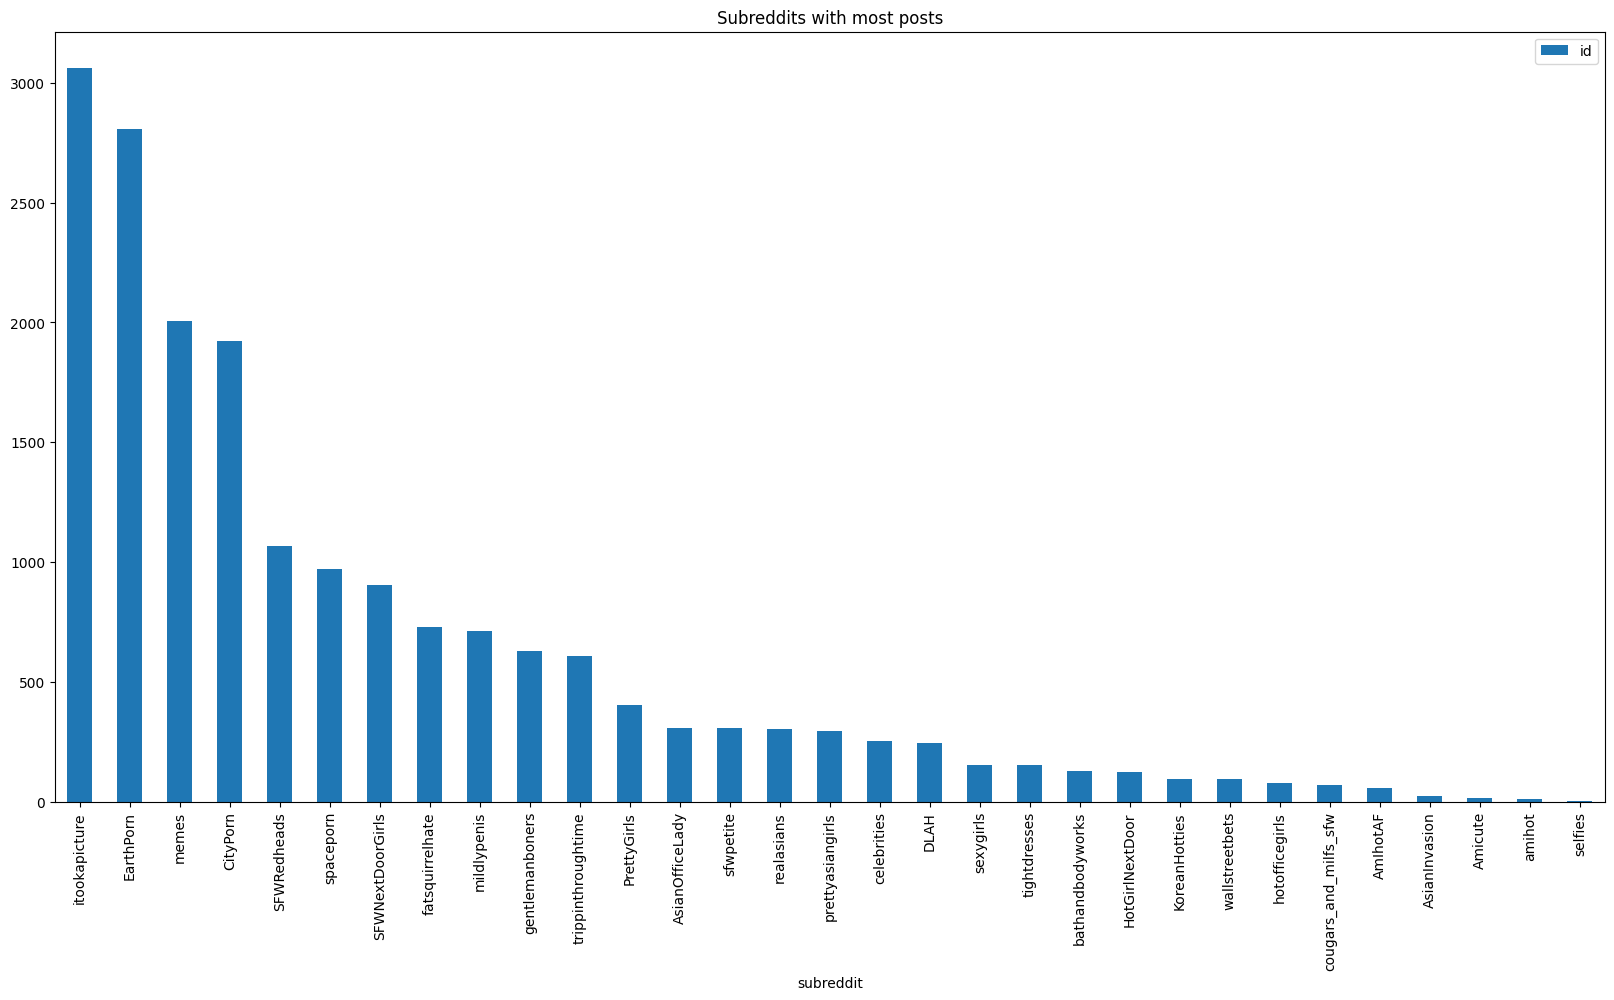

In [5]:
%%time

group = filtered_model[["id", "subreddit"]].groupby("subreddit").count().sort_values(by="id", ascending=False)

plot = group.plot.bar(figsize=(20, 10), title="Subreddits with most posts", legend=True)

display(plot)

<Axes: title={'center': 'Models with most images'}, xlabel='model'>

CPU times: total: 234 ms
Wall time: 265 ms


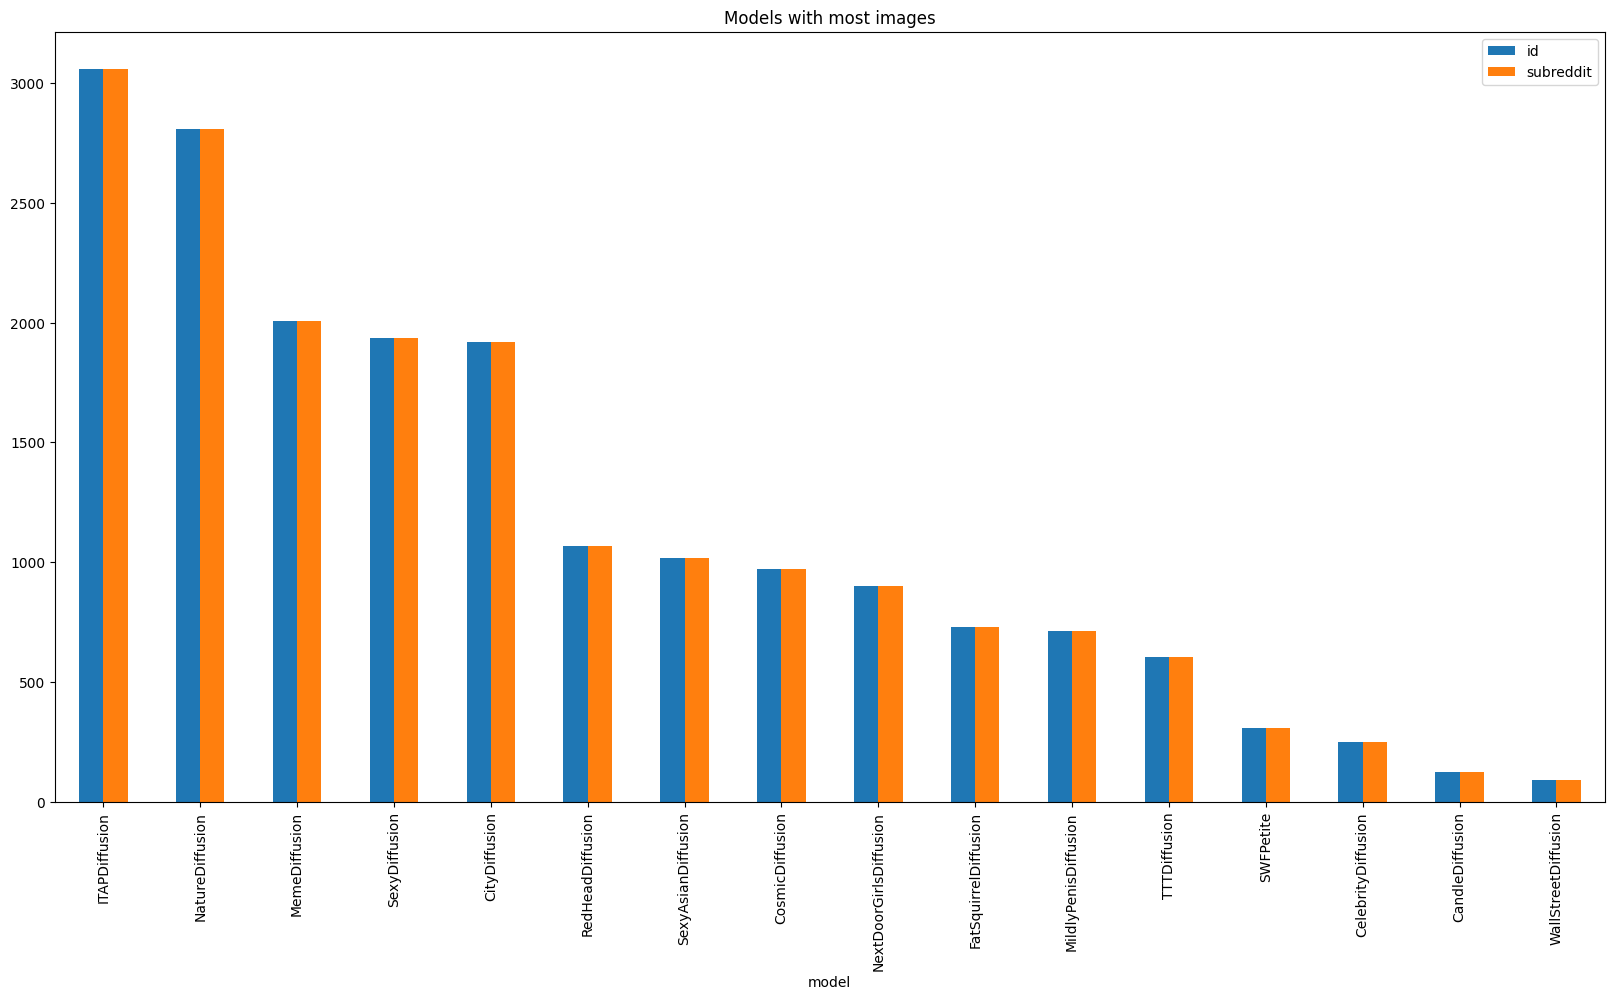

In [6]:
%%time

group = filtered_model[["id", "model", "subreddit"]].groupby(["model"]).count().sort_values(by="id", ascending=False)

plot_1 = group.plot.bar(figsize=(20, 10), title="Models with most images", legend=True)

display(plot_1)

In [8]:
%%time

current_captions = [item.replace('\n', '') for item in file_system.ls("data/caption")]
display(f"Total Number Of Caption Files Prior to Removal - {len(current_captions)}")

'Total Number Of Caption Files Prior to Removal - 8167'

In [ ]:
%%time

for caption in current_captions:
	if file_system.size(caption) == 0:
		print(f"Caption File {caption} is empty, deleting...")
		file_system.rm(caption)

current_captions = [item.replace('\n', '') for item in file_system.ls("data/caption")]
display(f"Total Number Of Caption Files - {len(current_captions)}")

In [ ]:
%%time

def run(_filtered_model, _current_captions):
	total = len(_filtered_model)
	i = 0
	j = 0

	for record in _filtered_model.to_dict(orient='records'):
		try:
			image_id = record['id']
			path = record['path']
			out_path = f"data/caption/{image_id}.json"
			if out_path in _current_captions:
				continue
			try:
				print(f"Captioning {i} of {total}")
				_file_system: AzureBlobFileSystem = AzureFileStorageAdapter('data').get_file_storage()
				remote_path: str = _file_system.url(path)
				caption_reference = AzureCaption(_file_system)
				caption_output = caption_reference.image_analysis(remote_path)

				if caption_output is None:
					print(f"Error In Output is empty for {image_id}")
					continue

				time.sleep(5)
				json_result = caption_output.json_result

				if json_result is None:
					print(f"Error In Json Result is empty for {image_id}")
					continue

				if json.loads(json_result).get('error'):
					print(f"Error In Json Result with: {json_result} for {image_id}")
					continue

				print(f"Writing Captioning For {image_id}")

				with _file_system.open(out_path, 'w', encoding='utf-8') as handle:
					handle.write(json_result)
					j += 1

				if _file_system.size(out_path) == 0:
					print(f"Caption File {out_path} is empty, deleting...")
					_file_system.rm(out_path)
					continue

				else:
					print(f"Captioning For {image_id} Complete new: {j}")
					print(f"Captioning {i} of {total}")
					continue

			except Exception as ex:
				print(f"Error in handle_captioning with exception {ex}")
				print(ex)
				continue

		finally:
			i += 1
			del caption_reference
			del _file_system

In [ ]:
%%time

file_system: AzureBlobFileSystem = AzureFileStorageAdapter('data').get_file_storage()

print("Loading Current Caption Files...")
current = file_system.ls("data/caption")
current_captions = [item.replace('\n', '') for item in current]
print(f"Total Number Of Caption Files Prior to Removal - {len(current_captions)}")

print("Removing Empty Caption Files...")
for caption in current_captions:
	if file_system.size(caption) == 0:
		print(f"Caption File {caption} is empty, deleting...")
		file_system.rm(caption)

print("Loading Current Caption Files POST Clean Up...")
current = file_system.ls("data/caption")
current_captions = [item.replace('\n', '') for item in current]
print(f"Total Number Of Caption Files - {len(current_captions)}")

In [1]:
filtered = curated_data.loc[curated_data["accept"] == True, schema.names]

filtered.dropna(inplace=True)

filtered.reset_index(inplace=True, drop=True)

filtered['model'] = filtered.apply(lambda x: functions.add_source(x, sources), axis=1)

filtered_model = filtered.loc[filtered['model'] != "", schema.names]

filtered_model.dropna(how='all', inplace=True)

filtered_model.reset_index(inplace=True, drop=True)

run(filtered_model, current_captions)

NameError: name 'curated_data' is not defined

In [ ]:
%%time

display(f"Total Number Of Caption Files - {len(file_system.ls('data/caption'))}")
display("0-2 Azure Image Analysis Process Complete - Shutting Down")

In [ ]:
# !jupyter notebook stop